<a href="https://colab.research.google.com/github/Asuduq/Geospatial/blob/main/Lagos_Metro_Accessibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q osmnx
!pip install -q pandana
!pip install -q h3
!pip install -q pydeck

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.4 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import shapely
import pandana as pdna
import h3
import pydeck as pdk
from urllib.request import urlopen
import json
import matplotlib.colors as mp_color
import matplotlib.cm as cmx

In [3]:
json_url = '[[[3.2396181999,6.3928915345],[3.4483584343,6.3928915345],[3.4483584343,6.6607666153],[3.2396181999,6.6607666153],[3.2396181999,6.3928915345]]]'

# Load the JSON data directly from the string
bboxs = json.loads(json_url)

# Access the coordinates - assuming you want the first set of coordinates
coords = bboxs[0][0]  # Access the first element of the first list

# Unpack coordinates
W, S = coords

# Assuming you want to create a bounding box, you'll need to define E and N
# based on your needs. Here's an example of creating a small bounding box:
E = W + 0.1
N = S + 0.1

bbox = shapely.box(W, S, E, N)

In [4]:
osm_network = ox.graph.graph_from_polygon(
    bbox,
    network_type='all',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=None,
    custom_filter=None
)

In [5]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Polygon

# Define your boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2396181999,6.3928915345),(3.4483584343,6.3928915345),
                    (3.4483584343,6.6607666153),(3.2396181999,6.6607666153),
                    (3.2396181999,6.3928915345)]]

# Create a Polygon from the boundary coordinates
polygon = Polygon(boundary_coords[0])

# Convert boundary into GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:4326")

# Get metro stations within the boundary
tags = {'railway': 'station', 'station': 'subway'}
metro_stations = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

print(metro_stations)

<ipython-input-5-4215ae5449a6>:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_stations = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                 name public_transport  \
element_type osmid                                                       
node         10776098576                       Marina          station   
             10777382244                       Iganmu          station   
             10777382245                       Mile 2          station   
             10777382246                        Alaba          station   
             10777382247             National Theatre          station   
way          981038963    Asiwaju Bola Tinubu Station          station   
             1157159790            Agege LRMT Station          station   
             1321599125          Marina Train Station          station   
relation     12868018        Mobolaji Johnson Station          station   

                          railway station  \
element_type osmid                          
node         10776098576  station  subway   
             10777382244  station  subway   
     

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [6]:
# Define boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into a GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Define tags for metro stations and their building footprints
tags = {'building': 'train_station'}

# Download metro station footprints within the boundary
metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

# Assign a default height of 30 for visualization purposes
metro_buildings['height'] = 30

print(metro_buildings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-9d0d1870390a>:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                                  geometry  \
element_type osmid                                                           
way          87798461    POLYGON ((3.38214 6.46991, 3.38230 6.46956, 3....   
             662451287   POLYGON ((3.36782 6.47463, 3.36957 6.47421, 3....   
             1157080488  POLYGON ((3.38101 6.48332, 3.38135 6.48346, 3....   
             1157269475  POLYGON ((3.33811 6.59079, 3.33835 6.59089, 3....   

                                                                     nodes  \
element_type osmid                                                           
way          87798461    [1020741162, 1020740883, 1020741150, 121967079...   
             662451287   [6201769124, 6201769125, 6201769126, 620176912...   
             1157080488  [10760220056, 10760220057, 10760220058, 107602...   
             1157269475  [10762027205, 10762027206, 10762027207, 107620...   

                              building building:levels  \
elem

In [7]:
# Define boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into a GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Define tags for metro stations and their building footprints
tags = {'building': 'train_station'}

# Download metro station footprints within the boundary
metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

# Assign a default height of 10 for visualization purposes
metro_buildings['height'] = 30

print(metro_buildings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-3f7cd9d67400>:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_buildings = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                                                  geometry  \
element_type osmid                                                           
way          87798461    POLYGON ((3.38214 6.46991, 3.38230 6.46956, 3....   
             662451287   POLYGON ((3.36782 6.47463, 3.36957 6.47421, 3....   
             1157080488  POLYGON ((3.38101 6.48332, 3.38135 6.48346, 3....   
             1157269475  POLYGON ((3.33811 6.59079, 3.33835 6.59089, 3....   

                                                                     nodes  \
element_type osmid                                                           
way          87798461    [1020741162, 1020740883, 1020741150, 121967079...   
             662451287   [6201769124, 6201769125, 6201769126, 620176912...   
             1157080488  [10760220056, 10760220057, 10760220058, 107602...   
             1157269475  [10762027205, 10762027206, 10762027207, 107620...   

                              building building:levels  \
elem

In [8]:

# Define your boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Define tags to get metro lines (e.g., tram, subway, etc.)
tags = {'railway': 'subway'}

# Fetch metro lines within the boundary
metro_lines = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)

# Filter for LineString geometries (routes)
metro_routes = metro_lines[metro_lines.geometry.type == 'LineString']

print(metro_routes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-a7ce35d0adc0>:16: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  metro_lines = ox.geometries_from_polygon(boundary_gdf.unary_union, tags)


                                   name  \
element_type osmid                        
way          662455003   LRMT Blue Line   
             662455004   LRMT Blue Line   
             1158760739  LRMT Blue Line   

                                                                  geometry  \
element_type osmid                                                           
way          662455003       LINESTRING (3.33909 6.47470, 3.33878 6.47448)   
             662455004   LINESTRING (3.33878 6.47448, 3.33845 6.47424, ...   
             1158760739      LINESTRING (3.39481 6.44613, 3.39412 6.44658)   

                                                                     nodes  \
element_type osmid                                                           
way          662455003                            [6288800082, 6288800083]   
             662455004   [6288800083, 5396198476, 5396198477, 620179080...   
             1158760739                         [10776098574, 10727987504]   

  

In [9]:
# Define your boundary coordinates (GeoJSON format)
boundary_coords = [[(3.2615908142,6.4038094301), (3.4758242546,6.4038094301),
                    (3.4758242546,6.6539464489), (3.2615908142,6.6539464489),
                    (3.2615908142,6.4038094301)]]

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Convert boundary into GeoDataFrame
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")

# Download the street network for the defined boundary
osm_network = ox.graph_from_polygon(boundary_polygon, network_type='drive')

nodes, edges = ox.convert.graph_to_gdfs(osm_network, nodes=True, edges=True) #node_geometry=True, fill_edge_geometry=True
edges = edges.reset_index()

print(nodes)
print(edges)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                    y         x  street_count          highway  \
osmid                                                            
31670138     6.651482  3.296697             4              NaN   
31673602     6.556648  3.357372             3              NaN   
31673613     6.552824  3.359371             4              NaN   
31673663     6.586942  3.356040             3              NaN   
31673672     6.579237  3.360431             3  traffic_signals   
...               ...       ...           ...              ...   
12217091263  6.595034  3.395109             1              NaN   
12217091266  6.599227  3.390551             1              NaN   
12229350531  6.531211  3.361846             1              NaN   
12231320183  6.608777  3.374147             1              NaN   
12234257370  6.532241  3.339221             3              NaN   

                            geometry  
osmid                                 
31670138     POINT (3.29670 6.65148)  
31673602     POINT (3.35

In [10]:
import pandana as pdna # Import the pandana library and assign it to the alias 'pdna'

network = pdna.Network(nodes["x"], nodes["y"], edges["u"], edges["v"], edges[["length"]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Download street network within your boundary coordinates
import osmnx as ox
from shapely.geometry import Polygon

# Create a Polygon from the boundary coordinates
boundary_polygon = Polygon(boundary_coords[0])

# Download the street network within the boundary
osm_network = ox.graph_from_polygon(boundary_polygon, network_type='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Set the Points of Interest (metro stations)
max_distance = 25000  # in meters
num_pois = 1
category = 'metro_stations'

# Import the Point object from shapely.geometry
from shapely.geometry import Point

# Create a GeoDataFrame with metro station data (replace with your actual data)
# Ensure it has a 'geometry' column with Point objects
station_nodes = gpd.GeoDataFrame({'name': ['Station A', 'Station B'],
                                 'geometry': [Point(3.2, 6.5), Point(3.4, 6.6)]},
                                crs="EPSG:4326")

# Ensure station_nodes contains geometries with x and y columns
station_nodes['x'] = station_nodes['geometry'].x
station_nodes['y'] = station_nodes['geometry'].y

# Set POIs and calculate nearest POIs
network.set_pois(category=category, maxdist=max_distance, maxitems=num_pois,
                 x_col=station_nodes['x'], y_col=station_nodes['y'])

# Calculate accessibility (distance to nearest metro station)
accessibility = network.nearest_pois(distance=max_distance, category=category, num_pois=num_pois)

# Output accessibility as a pandas DataFrame
print(accessibility)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                        1
osmid                    
31670138     16926.212891
31673602      8213.508789
31673613      8376.403320
31673663      7852.421875
31673672      6763.391113
...                   ...
12217091263   1048.260010
12217091266   1572.385010
12229350531  11308.960938
12231320183   4823.769043
12234257370  11032.625000

[32995 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

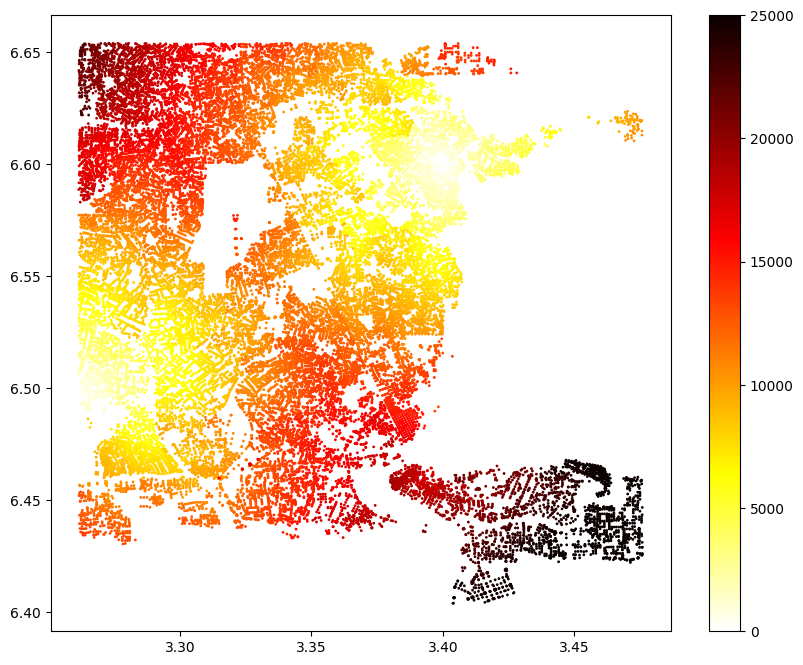

In [13]:
import matplotlib.pyplot as plt

# Define a function to plot accessibility
def plot_nearest_amenity(accessibility, n):
    fig, ax = network.plot(accessibility[n])
    ax.set_facecolor('k')  # Black background
    ax.set_title('Pedestrian accessibility to nearest Metro Stations (distance to POIs, in meters)', fontsize=14)
    return fig

# Plot and visualize the accessibility results
fig = plot_nearest_amenity(accessibility, num_pois)
plt.show()


In [14]:
APERTURE_SIZE = 9
hex_col = 'hex'+str(APERTURE_SIZE)

distance = nodes.join(accessibility)[['geometry', 1]].rename(columns={1:'distance_m'})
distance[hex_col] = distance.apply(lambda p: h3.geo_to_h3(p.geometry.y,p.geometry.x,APERTURE_SIZE),1)

distance_m = distance[[hex_col, 'distance_m']].groupby(hex_col).mean().reset_index()

In [15]:
distance_m['mins'] = distance_m['distance_m']/(30*16.6667)
distance_m['display_text'] = distance_m['mins'].apply(lambda x: f"Accessibility: {x:.0f} mins")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
def create_custom_cmap(values):
    # Define the colors for the colormap
    colors = ['#42f5da', '#7DDA58', '#DECE58', '#DE8758', '#DE5858']

    # Create the colormap object
    cmap = mp_color.ListedColormap(colors)

    # Define the color boundaries for the colormap
    boundaries = values

    # Create the normalization object
    norm = mp_color.BoundaryNorm(boundaries, len(colors))

    return cmap, norm

def get_color_value(value, cmap, norm):
    # Normalize the value to the range of the colormap
    norm_value = norm(value)

    # Get the color value from the colormap
    color = cmap(norm_value)

    scaled_colors = list(map(lambda x: int(x*255), color[:3]))
    scaled_alpha = int(color[3]*100)

    scaled_colors += [scaled_alpha]
    return scaled_colors


def colormap_dataframe(df, value_col, cmap, norm, max_val=None):

    xdf = df.copy()
    xdf['color'] = xdf[f'{value_col}'].apply(lambda x: get_color_value(x, cmap, norm))
    xdf[['R', 'G', 'B', 'A']] = pd.DataFrame(xdf['color'].to_list())
    xdf = xdf.drop(['color'], axis=1)

    xdf[value_col] = xdf[value_col].round(1)

    return xdf

def create_h3_hex_layer(df):

    # Define a layer to display on a map
    layer = pdk.Layer(
        "H3HexagonLayer",
        df,
        pickable=True,
        stroked=True,
        filled=True,
        extruded=False,
        get_hexagon=hex_col,
        get_fill_color="[R, G, B, A]"
    )

    return layer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Convert station_nodes to GeoJSON format
station_viz_json = station_nodes.to_json()

# Define the layers
station_layer = pdk.Layer(
    'GeoJsonLayer',
    data=station_viz_json,
    stroked=True,
    getLineColor=[158, 2, 38, 100],
    getLineWidth=10,
    filled=True,
    get_fill_color=[158, 2, 38, 100],
    extruded=True,
    get_elevation=30,
    pickable=True
)

route_layer = pdk.Layer(
    'PathLayer',
    data=metro_lines,
    pickable=True,
    get_color='color',
    width_scale=1,
    get_path="path",
    get_width=20
)

# Apply the colormap to the dataframe
cmap, norm = create_custom_cmap([0, 5, 10, 20, 40, distance_m['mins'].max()])
xdf = colormap_dataframe(df=distance_m, value_col='mins', cmap=cmap, norm=norm)

# Create a H3HexagonLayer
layer = create_h3_hex_layer(xdf)

# Set the viewport location
boundary_polygon = Polygon(boundary_coords[0])
boundary_gdf = gpd.GeoDataFrame(geometry=[boundary_polygon], crs="EPSG:4326")
boundary = boundary_gdf.total_bounds
x, y = boundary[0] + (boundary[2] - boundary[0]) / 2, boundary[1] + (boundary[3] - boundary[1]) / 2
view_state = pdk.ViewState(latitude=y, longitude=x, zoom=11, bearing=0, pitch=45)

tooltip = {
    "html": "{display_text}",
    "style": {
        "backgroundColor": "#4CAF50",
        "color": "#FFFFFF",
        "border": "2px solid #4CAF50",
        "borderRadius": "5px",
        "boxShadow": "2px 2px 10px rgba(0, 0, 0, 0.2)"
    }
}

# Define legend_html - You need to define the HTML content for your legend
legend_html = """
    <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <b>Legend:</b><br>
        <span style="background-color: #42f5da; padding: 5px; border-radius: 5px;">0-5 mins</span><br>
        <span style="background-color: #7DDA58; padding: 5px; border-radius: 5px;">5-10 mins</span><br>
        <span style="background-color: #DECE58; padding: 5px; border-radius: 5px;">10-20 mins</span><br>
        <span style="background-color: #DE8758; padding: 5px; border-radius: 5px;">20-40 mins</span><br>
        <span style="background-color: #DE5858; padding: 5px; border-radius: 5px;">>40 mins</span>
    </div>
"""

# Render
r = pdk.Deck(layers=[station_layer, layer, route_layer], initial_view_state=view_state, tooltip=tooltip, description=legend_html)
r

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


<IPython.core.display.Javascript object>

{
  "description": "\n    <div style=\"background-color: white; padding: 10px; border-radius: 5px;\">\n        <b>Legend:</b><br>\n        <span style=\"background-color: #42f5da; padding: 5px; border-radius: 5px;\">0-5 mins</span><br>\n        <span style=\"background-color: #7DDA58; padding: 5px; border-radius: 5px;\">5-10 mins</span><br>\n        <span style=\"background-color: #DECE58; padding: 5px; border-radius: 5px;\">10-20 mins</span><br>\n        <span style=\"background-color: #DE8758; padding: 5px; border-radius: 5px;\">20-40 mins</span><br>\n        <span style=\"background-color: #DE5858; padding: 5px; border-radius: 5px;\">>40 mins</span>\n    </div>\n",
  "initialViewState": {
    "bearing": 0,
    "latitude": 6.5288779395,
    "longitude": 3.3687075344,
    "pitch": 45,
    "zoom": 11
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": "{\"type\": \"FeatureCollection\", \"features\": [{\"id\": \"0\", \"type\": \"Feature\", \"properties\": {\"name\": \"Station A\", \"x\": 3.2, \"y\": 6.5}, \"geometry\": {\"type\": \"Point\", \"coordinates\": [3.2, 6.5]}}, {\"id\": \"1\", \"type\": \"Feature\", \"properties\": {\"name\": \"Station B\", \"x\": 3.4, \"y\": 6.6}, \"geometry\": {\"type\": \"Point\", \"coordinates\": [3.4, 6.6]}}]}",
      "extruded": true,
      "filled": true,
      "getElevation": 30,
      "getFillColor": [
        158,
        2,
        38,
        100
      ],
      "getLineColor": [
        158,
        2,
        38,
        100
      ],
      "getLineWidth": 10,
      "id": "d2989ddf-d59c-4d35-a192-de3d3640db67",
      "pickable": true,
      "stroked": true
    },
    {
      "@@type": "H3HexagonLayer",
      "data": [
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 28 mins",
          "distance_m": 13864.040625,
          "hex9": "89588264003ffff",
          "mins": 27.7
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 27 mins",
          "distance_m": 13523.044320913461,
          "hex9": "89588264007ffff",
          "mins": 27.0
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 28 mins",
          "distance_m": 14011.612141927084,
          "hex9": "8958826400bffff",
          "mins": 28.0
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 27 mins",
          "distance_m": 13683.331752232143,
          "hex9": "8958826400fffff",
          "mins": 27.4
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 28 mins",
          "distance_m": 14189.076526988636,
          "hex9": "89588264013ffff",
          "mins": 28.4
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 28 mins",
          "distance_m": 13868.758413461539,
          "hex9": "89588264017ffff",
          "mins": 27.7
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 29 mins",
          "distance_m": 14414.194056919643,
          "hex9": "8958826401bffff",
          "mins": 28.8
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 26 mins",
          "distance_m": 12999.2998046875,
          "hex9": "89588264023ffff",
          "mins": 26.0
        },
        {
          "A": 100,
          "B": 88,
          "G": 135,
          "R": 222,
          "display_text": "Accessibility: 25 mins",
          "distance_m": 12698.29931640625,
          "hex9": "89588264027ffff",
          "mins": 25.4
        },
  